# **8-Beeswarm Comparasion**

In [ ]:

# make sure you have done pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib
import json
import yaml


# Bar graphs
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager
from mplsoccer import Pitch, VerticalPitch
import cmasher as cmr
import matplotlib.patches as mpatches
from matplotlib.patches import RegularPolygon
from PIL import Image
import urllib
import json
import os
import math
from selenium.webdriver.chrome.service import Service
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime
from ast import literal_eval
from scipy import stats
from scipy.spatial import ConvexHull
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text

from matplotlib.colors import LinearSegmentedColormap  
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

red_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#FFBEBE', '#FF0000'], N=10)
el_greco_violet_cmap = LinearSegmentedColormap.from_list("El Greco Violet - 10 colors",
                                                         ['#332a49', '#8e78a0'], N=10)
el_greco_yellow_cmap = LinearSegmentedColormap.from_list("El Greco Yellow - 10 colors",
                                                         ['#7c2e2a', '#f2dd44'], N=10)
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
# same color maps but with 100 colors
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)
el_greco_violet_cmap_100 = LinearSegmentedColormap.from_list("El Greco Violet - 100 colors",
                                                             ['#3b3154', '#8e78a0'], N=100)
el_greco_yellow_cmap_100 = LinearSegmentedColormap.from_list("El Greco Yellow - 100 colors",
                                                             ['#7c2e2a', '#f2dd44'], N=100)
flamingo_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#e3aca7', '#c03a1d'], N=100)

from mplsoccer import Radar
""" Functions to plot a grid of axes with an endnote and title."""

import matplotlib.pyplot as plt
import numpy as np



In [2]:
liga = pd.read_csv(r"24.csv") # Fbref Data


In [3]:
liga = liga.drop_duplicates(subset=['Player', 'Nation', 'Squad'], keep='first')
liga["npG"] = liga["Goals"] - liga["PK"]
liga["npG90"] = liga["npG"]*90/liga["Min"]
liga["npG"].max()

15

In [4]:
liga["pAdjBlocks"] = liga["pAdjShBlocksPer90"]+liga["pAdjPassBlocksPer90"]
kik = liga[(liga["Pos"] == "FW") | (liga["Pos"] == "FW,DF") | (liga["Pos"] == "FW,MF")| (liga["Pos"] == "MF,FW")]
# kik = prem[(prem["Pos"] == "FW") | (prem["Pos"] == "FW,DF") | (prem["Pos"] == "FW,MF")| (prem["Pos"] == "MF,FW")]
kik = kik[kik["Min"] >= 12*90 ]
kik = kik.reset_index(drop=True)


metrics = ['npG90','npxGPer90','SoTPer90','ShotsPer90','AttDrbPer90',
           'DrbSucc%','CarriesToPenAreaPer90','SCAPer90']


In [5]:
len(metrics)

8

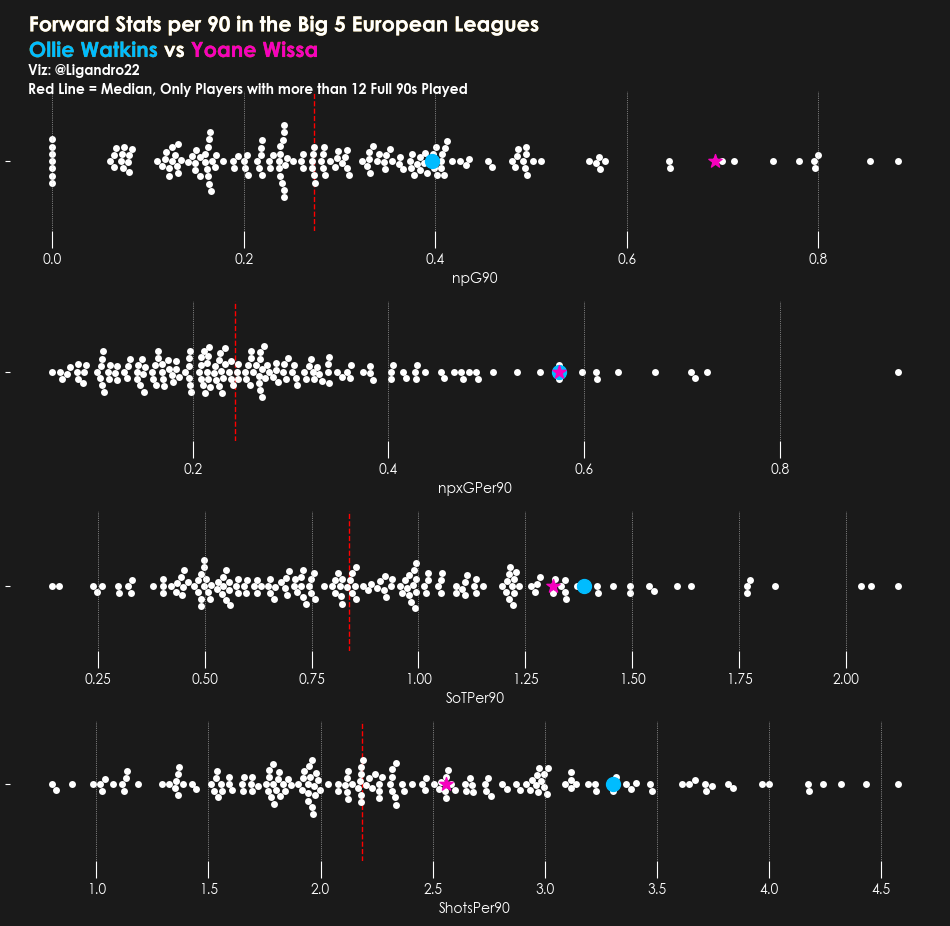

In [11]:
fig,axes = plt.subplots(4,1,figsize=(12,10))

# import warning

# # Suppress future warnings related to the use_inf_as_na option
# warnings.simplefilter(action='ignore', category=FutureWarning)

fig.set_facecolor('#1A1A1A')

# Set use_inf_as_na option to True globally
pd.set_option('mode.use_inf_as_na', True)
#set up our base layer
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"



Player1 = "Ollie Watkins"
Player2 = "Yoane Wissa"

#create a list of comparisons
counter=0
met_counter = 0

text_color= 'white'
for i,ax in zip(kik['Player'],axes.flatten()):
    ax.set_facecolor('#1A1A1A')
    ax.patch.set_facecolor('#1A1A1A')
    # Draw gridlines on top
    ax.grid(ls='dotted', lw=.5, color='lightgrey', axis='y', zorder=3)
    ax.grid(ls='dotted', lw=.5, color='lightgrey', axis='x', zorder=3)
    
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    sns.swarmplot(x=metrics[met_counter],data=kik,ax=axes[counter],zorder=1,color='white')
    ax.set_xlabel(f'{metrics[met_counter]}',c='white',font="Century Gothic")
    ax.tick_params(axis='x', color='white',size=12, labelfontfamily='Century Gothic')

    median_value = kik[metrics[met_counter]].median()
    ax.axvline(x=median_value, color='red', linestyle='--', linewidth=1,zorder=-1)

    for x in range(len(kik['Player'])):
        #if df2['Player'][x] == 'Thiago Alcántara':
            #ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='red',zorder=2)
        if kik['Player'][x] ==Player1 :
            ax.scatter(x=kik[metrics[met_counter]][x],y=0,s=100,c='#00BCFF',zorder=2)
            # ax.text(s=kik['Player'][x],x=kik[metrics[met_counter]][x]-0.06*kik[metrics[met_counter]][x],y=-0.003,c="#00BCFF",font='STXihei'
            #  , path_effects=[path_effects.Stroke(linewidth=0.2, foreground="white"), path_effects.Normal()],)
        if kik['Player'][x] ==Player2 :
            ax.scatter(x=kik[metrics[met_counter]][x],y=0,s=100,c='#F600BE', marker='*', zorder=2)
            # ax.text(s=kik['Player'][x],x=kik[metrics[met_counter]][x]-0.06*kik[metrics[met_counter]][x],y=-0.003,c="#00BCFF",font='STXihei'
            #  , path_effects=[path_effects.Stroke(linewidth=0.2, foreground="white"), path_effects.Normal()],)



    counter+=1
    met_counter+=1

    
# Adjust vertical space between subplots
plt.subplots_adjust(hspace=0.5)
plt.xticks(fontname ='STXihei',color="white")


str_text = f'''Forward Stats per 90 in the Big 5 European Leagues\n<{Player1}> vs <{Player2}>'''
fig_text(
    x = 0.354, y = 0.91, 
    s = str_text,highlight_textprops=[{'color':'#00BCFF', 'weight':'bold'},{'color':'#F600BE', 'weight':'bold'}],
    va = 'bottom', ha = 'center',fontname ="Century Gothic", weight = 'bold',
    fontsize = 15,color ='white',path_effects=[path_effects.Stroke(linewidth=0.2, foreground="#BD8B00"), path_effects.Normal()]
)

str_text = f'''Viz: @Ligandro22\nRed Line = Median, Only Players with more than 12 Full 90s Played'''
fig_text(
    x = 0.323, y = 0.874, 
    s = str_text,
    va = 'bottom', ha = 'center',fontname ="Century Gothic", weight = 'bold',
    fontsize = 10,color ='white'
)
plt.savefig(r"C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Neurotactic Work\Rating System\Images\BeeLiga.jpg",dpi =500, bbox_inches='tight')
